In [1]:
# 상권 분석
# https://www.data.go.kr/data/15083033/fileData.do

In [2]:
!unzip '/content/drive/MyDrive/Colab Notebooks/소상공인시장진흥공단_상가(상권)정보_20221231.zip' -d '/content/drive/MyDrive/Colab Notebooks/data/상권분석'

Archive:  /content/drive/MyDrive/Colab Notebooks/소상공인시장진흥공단_상가(상권)정보_20221231.zip
replace /content/drive/MyDrive/Colab Notebooks/data/상권분석/[필독]파일열람방법.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
import glob
import pandas as pd
file_lists = glob.glob('/content/drive/MyDrive/Colab Notebooks/data/상권분석/*.csv')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium

In [5]:
df_202212_세종 = pd.read_csv(file_lists[0])
df_202212_세종.shape

(13399, 39)

In [6]:
df_202212_세종.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
# 상권중에 커피가 들어간 업종의 갯수
df_coffee =  df_202212_세종[df_202212_세종['상권업종소분류명'].str.contains('커피')]
df_coffee.shape

(679, 39)

In [8]:
# 서울의 커피전문점의 개수  
df_seoul = pd.read_csv( file_lists[-2])
df_seoul[df_seoul['상권업종소분류명'].str.contains('커피')]
df_seoul.shape

(377724, 39)

In [9]:
df_seoul2 =  df_seoul[df_seoul['상권업종소분류명'].str.contains('커피')]

In [10]:
# 커피전문점의 이름들...
# 상호명중에 가장 많은 이름의 상호를 찾아보자
df_seoul2['상호명'].value_counts()[:10]

카페         710
이디야커피      400
스타벅스       324
메가엠지씨커피    239
컴포즈커피      226
투썸플레이스     180
빽다방        157
공차         107
커피빈        101
커피베이        95
Name: 상호명, dtype: int64

In [11]:
df_coffee_id =  df_seoul2[df_seoul2['상호명'] == '이디야커피']
df_coffee_id.reset_index(drop=True,inplace=True)

In [12]:
# 중복없이 지점만 출력
df_coffee_id['지점명'].unique()

array(['신길역점', '라이프점', '시흥점', '개봉중앙점', '해군회관점', '대방역점', '등촌역점', '도림사거리',
       '은행나무사거리점', '둔촌점', '약수역점', '영등포아크로타워점', '디지털미디어시티역사점', '동덕여대점',
       '중계롯데우성점', '양재언남점', '수유역점', nan, '사당역점', '강동구청점', '오금점', '광운대점',
       '건대후문점', '삼전역점', '미아역점', '고덕점', '구일역점', '용산효창점', '신당점', '신림남부초교점',
       '어린이대공원역점', '녹번동점', '목3동점', '강남논현학동점', '신월7동점', '송파잠실점', '우림시장점',
       '마장동점', '여의도역점', '공덕롯데캐슬', '북촌마을점', '중화동점', '한티역점', '성수중앙점',
       '신길아이파크점', '당산버드나루점', '까치산로점', '동대문구청점', '방이초교점', '용산원효점', '아현역점',
       '등촌중앙점', '강서가양동점', '합정역사거리점', '종로삼일대로점', '이화여대점', '신길성애병원점',
       '합정홈플러스점', '도봉산점', '길동사거리점', '구로역광장점', '고덕그라시움후문점', '신촌그랑자이점',
       '국회의사당역점', '잠실본동점', '먹골역점', '마곡파인스퀘어점', '목동신트리점', '면목본동점', '가산벽산점',
       '중대후문점', '용산후암점', '북서울꿈의숲점', '메르디앙고척점', '구의자양로점', '총신대입구역점',
       'IBK점', '개롱역점', '구로미성점', '화랑대역점', '중계점', '선유도역점', '신상도초교점', '청구역점',
       '합정동점', '마천사거리점', '강남고속터미널점', '상봉엠코점', '방이미성점', '송정역점', '청룡중앙점',
       '방화역점', '난향동점', '신촌역점', '용두동사거리점', '오장동점', '천호역점', '역삼중앙점',


In [13]:
# 전처리... (커피전문점에 대해.... 이디야커피)
# 지점명이 na이면 해당 na의 상호명으로 대체
df_coffee_id[df_coffee_id['지점명'].isna()]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
17,28455232,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1129013600102220004000003,서울숭인초등학교,서울특별시 성북구 오패산로16길 37,136130,2741.0,NaN,NaN,NaN,127.038218,37.609154
26,23413578,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1130510100108600076021900,NaN,서울특별시 강북구 솔샘로 257,142100,1178.0,NaN,NaN,NaN,127.021490,37.619532
30,12329867,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1150010300100840004018429,NaN,서울특별시 강서구 우현로 15,157870,7695.0,NaN,1,NaN,126.843611,37.547156
110,23399621,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1132010500102560000004442,에벤에셀아파트,서울특별시 도봉구 해등로 255,132030,1429.0,NaN,2,NaN,127.028132,37.657475
126,16986288,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010500101590009016086,코엑스,서울특별시 강남구 영동대로 513,135525,6164.0,NaN,NaN,NaN,127.059139,37.511820
134,12066544,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1150010900106860001003098,"김포공항,롯데몰,스카이시티",서울특별시 강서구 하늘길 38,157220,7505.0,NaN,B2,NaN,126.802937,37.571357
140,11870411,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1126010400101890005000001,먹골역,서울특별시 중랑구 동일로 901,131140,2006.0,NaN,-3,NaN,127.077751,37.610614
168,16960893,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1138010800100430002018726,NaN,서울특별시 은평구 진흥로1길 3,122899,3409.0,NaN,1,NaN,126.918612,37.600757
173,16962873,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156012600100370001000001,동아프라임밸리,서울특별시 영등포구 양산로9길 15,150103,7270.0,NaN,NaN,NaN,126.888527,37.526539
176,17051088,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111016300101820005012361,NaN,서울특별시 종로구 동호로 406-1,110836,3196.0,NaN,NaN,NaN,127.002241,37.570588


In [14]:
temp = df_coffee_id.loc[:,['상호명','지점명']].ffill(axis=1)
df_coffee_id.loc[:,'지점명']  = temp['지점명']

<ipython-input-14-f39628850e5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_id.loc[:,'지점명']  = temp['지점명']


In [15]:
pd.options.display.max_columns = None

In [16]:
df_coffee_id.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11560,영등포구,1156063000,신길1동,1156013200,신길동,1156013200100590002,1,대지,59,2.0,서울특별시 영등포구 신길동 59-2,115603118022,서울특별시 영등포구 영등포로,353,NaN,1156013200100590002019075,엔씨티오피스텔,서울특별시 영등포구 영등포로 353,150050,7318.0,NaN,1,NaN,126.918062,37.515118


In [17]:
# 전국데이터에 대해서
# 1. 상권업종소분류명 에 커피가 포함되어  있는 데이터를 찾아서
# 2. 상호명의 수를 count하고
# 3. 가장많이 나온 프랜차이즈 상호에대해서 데이터를 정리..

In [18]:
df_lists = [pd.read_csv(file,low_memory=False) for file in file_lists]

In [19]:
df = pd.concat(df_lists)
df.shape

(2532877, 39)

In [20]:
df_coffee =  df[df['상권업종소분류명'].str.contains('커피')]
df_coffee.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
239,16166632,커피예술,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,36,세종특별자치시,36110,세종특별자치시,3611051500,새롬동,3611010700,나성동,3611010700107120000,1,대지,712,NaN,세종특별자치시 나성동 712,361102000002,세종특별자치시 한누리대로,211,NaN,3611010700104740000000001,세종퍼스트타워,세종특별자치시 한누리대로 211,339003.0,30130.0,NaN,1,NaN,127.259471,36.483508
243,16166586,청년다방,세종종촌점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,36,세종특별자치시,36110,세종특별자치시,3611054000,종촌동,3611011100,종촌동,3611011100106680000,1,대지,668,NaN,세종특별자치시 종촌동 668,361103258103,세종특별자치시 달빛로,43,NaN,3611011100106680000000001,금강빌딩,세종특별자치시 달빛로 43,339013.0,30064.0,NaN,1,NaN,127.250023,36.502717
258,16165956,브라운힐스커피숍,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,36,세종특별자치시,36110,세종특별자치시,3611051000,한솔동,3611010600,한솔동,3611010600109330000,1,대지,933,NaN,세종특별자치시 한솔동 933,361103258060,세종특별자치시 노을3로,84,NaN,3611010600101670003000002,브라운스84,세종특별자치시 노을3로 84,339014.0,30130.0,NaN,1,NaN,127.255315,36.479328
328,16201240,바이핸커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,36,세종특별자치시,36110,세종특별자치시,3611052000,도담동,3611011000,어진동,3611011000105280000,1,대지,528,NaN,세종특별자치시 어진동 528,361103258075,세종특별자치시 절재로,172,NaN,3611011000101030079000001,태한프레스센터,세종특별자치시 절재로 172,339012.0,30102.0,NaN,NaN,NaN,127.260141,36.508116
374,5079543,콜다방,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,36,세종특별자치시,36110,세종특별자치시,3611034000,금남면,3611034021,금남면,3611034021101930001,1,대지,193,1.0,세종특별자치시 금남면 용포리 193-1,361104574094,세종특별자치시 금남면 대평시장1길,18,NaN,4473034021101930001029859,NaN,세종특별자치시 금남면 대평시장1길 18,339835.0,30083.0,NaN,1,NaN,127.282200,36.467019


In [21]:
df_coffee['상호명'].value_counts()

카페              5218
이디야커피           2075
컴포즈커피           1376
스타벅스            1208
투썸플레이스           926
                ... 
Lifeofcookie       1
케빈유커피              1
데일리달콤              1
ARK                1
아히루                1
Name: 상호명, Length: 65770, dtype: int64

In [22]:
df_coffee.loc[df_coffee['상호명'].str.contains('이디야'),'상호명'].unique()

array(['이디야커피', '이디야커피전문점', '이디야커피달동사거리점', '이디야커피울산야음루첸점', '이디야커피숍',
       '이디야커피복산점', '이디야커피제주중문점', '이디야커피한라수목원점', '이디야커피서귀포이마트점', '케이디야스텍',
       '이디야커피프렌차이즈', '이디야에스프레소', '이디야커피강릉올림픽선수촌점', '이디야커피인제점인제점', '양양이디야',
       '이디야커피낙원점', '이디야커피홍천제일점', '이디야커피장학점', '이디야커피오창과학단지점', '이디야커피증평중앙점',
       '이디야커피청주분평점', '이디야드림플러스', '이디야커피대구송현점', '이디야커피대명동점', '이디야커피대구봉덕점',
       '이디야커피영광백수해안도로점', '이디야커피광양포스코점', '이디야커피순천중앙점', '이디야커피강진점',
       '이디야커피김제터미널점', '이디야커피익산터미널점', '이디야커피군산수송동점', '이디야커피익산어양동점',
       '이디야커피고창터미널점', '이디야커피격포점', '이디야커피익산역점', '이디야커피전주반월동점',
       '이디야커피전주팔복동점', '이디야커피전주고속터미널점', '이디야안골네거리', '행복한도시이디야커피전주에코로마네',
       '이디야커피을왕리점', '이디야커피인천학익점', '이디야부평굴다리', '이디야커피인하공전점', '송도이디야오네',
       '이디야커피안면점', '이디야커피천안상명대점', '이디야커피장항', '이디야커피덕곡점덕곡점',
       '이디야커피경주황성유림점', '이디야커피경북성주점', '이디야커피경주안강점', '이디야커피수영현대점',
       '이디야커피보수점', '이디야커피부산괴정대로점', '이디야커피경마공원점', '이디야커피부산금강로점',
       '이디야커피서부산유통지구점', '이디야커피국제물류점', '이디야커피유엔공원점', '이디야거제홈타운',
       '이디야커피창녕점', '이디야커피김해부원동점', '이디야커피창원

In [23]:
# 컬럼에서 '코드'가 들어 있는 컬럼을 제외한다.

In [24]:
df_coffee.columns[df_coffee.columns.str.contains('코드')] + ['건물관리번호']
df_coffee_drop = df_coffee.drop(columns = df_coffee.columns[df_coffee.columns.str.contains('코드')])

In [25]:
df_coffee_drop['상호명'].value_counts()[1:5]

이디야커피     2075
컴포즈커피     1376
스타벅스      1208
투썸플레이스     926
Name: 상호명, dtype: int64

In [26]:
df_coffee_drop['상호명'].value_counts()[1:5].index

Index(['이디야커피', '컴포즈커피', '스타벅스', '투썸플레이스'], dtype='object')

In [27]:
store_count = []
for store in ['이디야', '컴포즈', '스타벅스', '투썸플레이스']:
  count_ = len(df_coffee_drop.loc[df_coffee_drop['상호명'].str.contains(store), '상호명'])
  store_count.append(count_)

dict(zip(df_coffee_drop['상호명'].value_counts()[1:5].index,store_count))


{'이디야커피': 2224, '컴포즈커피': 1437, '스타벅스': 1506, '투썸플레이스': 1119}

In [28]:
 # 4개 지점의 데이터만 추출 
 major_store_4 = ['이디야', '컴포즈', '스타벅스', '투썸플레이스'] 

In [29]:
temp = [df_coffee_drop['상호명'].str.contains(i)  for i in major_store_4]

In [30]:
from functools import reduce
temp = reduce(lambda x,y: x+y, temp )

In [31]:
df_coffee_top4 = df_coffee_drop.loc[temp]

temp = np.where(df_coffee_top4['상호명'].str.contains('이디야'),'이디야',np.nan)
temp = np.where(df_coffee_top4['상호명'].str.contains('컴포즈'),'컴포즈',temp)
temp = np.where(df_coffee_top4['상호명'].str.contains('스타벅스'),'스타벅스',temp)
temp = np.where(df_coffee_top4['상호명'].str.contains('투썸플레이스'),'투썸플레이스',temp)
df_coffee_top4['프렌차이즈명'] =temp

<ipython-input-31-7b3983b8a7ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_top4['프렌차이즈명'] =temp


In [32]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

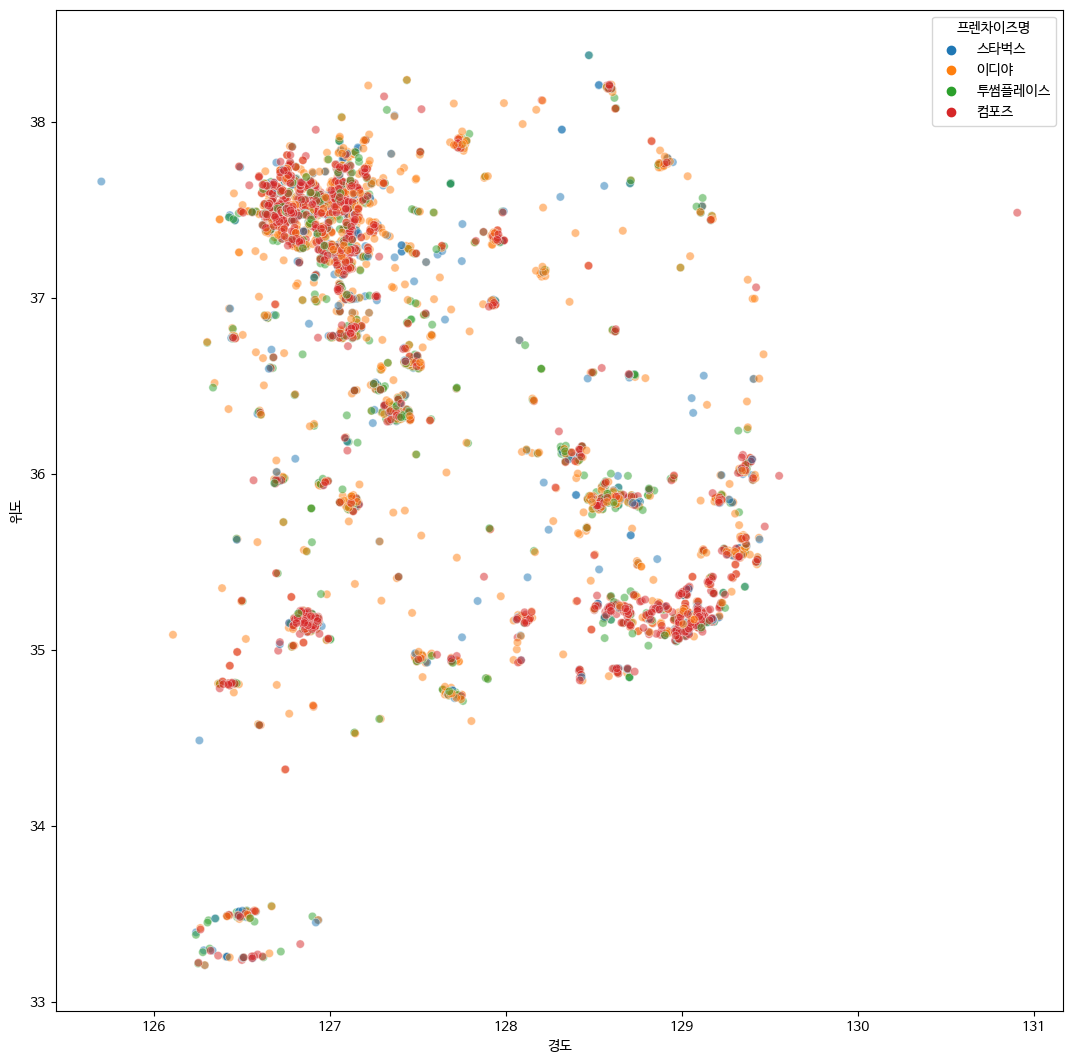

In [40]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns
plt.figure(figsize=(13,13))
sns.scatterplot(data = df_coffee_top4,x = '경도', y='위도', hue='프렌차이즈명',alpha = 0.5)
# df_coffee_top4.plot(kind = 'scatter', x = '경도', y='위도', grid=True)
plt.show()

In [34]:
import numpy as np


In [35]:
temp

array(['스타벅스', '스타벅스', '이디야', ..., '컴포즈', '투썸플레이스', '컴포즈'], dtype='<U32')